## Imports

In [3]:
import os, time, timeit, json, torch
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%load_ext autoreload
%autoreload 2
from scripts import farseeing, classifiers, utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
X_train, y_train, X_test, y_test = utils.train_test_subjects_split(farseeing)

Train set: X: (1173, 700), y: (1173,)        ([ADLs, Falls]) [1062  111]
Test set: X: (141, 700), y: (141,)        ([ADLs, Falls]) [107  34]


In [9]:
test, m = classifiers.run_models('tabular', X_train, y_train, X_test, y_test,
                       freq=100, subset=['ExtraTrees'])

> ExtraTrees        (win_size=2750)	Training/Testing in 0.39 secs.


In [10]:
test

,model,window_size,runtime,precision,recall,f1-score
0,ExtraTrees,2750,0.39,0.97,1.0,0.99


In [1]:
import seaborn as sns
plt.figure(figsize=(8,2), dpi=200)
plt.plot(accel[59800:60700])
plt.legend(['x','y','z'])
plt.vlines([90,190,290,790], -3, 3, linestyles=":", colors='black')
plt.xlabel('Time')
plt.ylabel('Acceleration (g)')
sns.despine()

NameError: name 'plt' is not defined

Train set: X: (693, 2750), y: (693,)    ([ADLs, Falls]) [599  94]
Test set: X: (516, 2750), y: (516,)    ([ADLs, Falls]) [465  51]


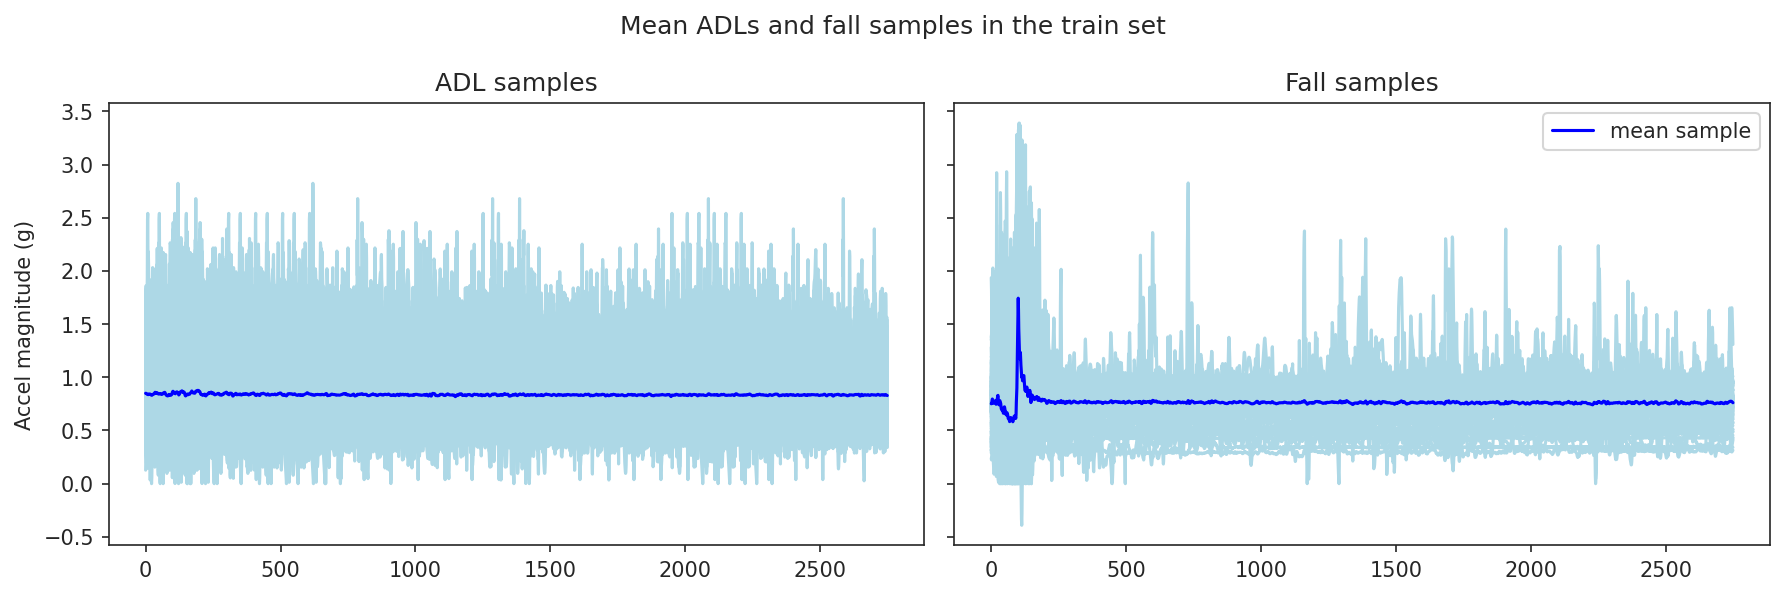

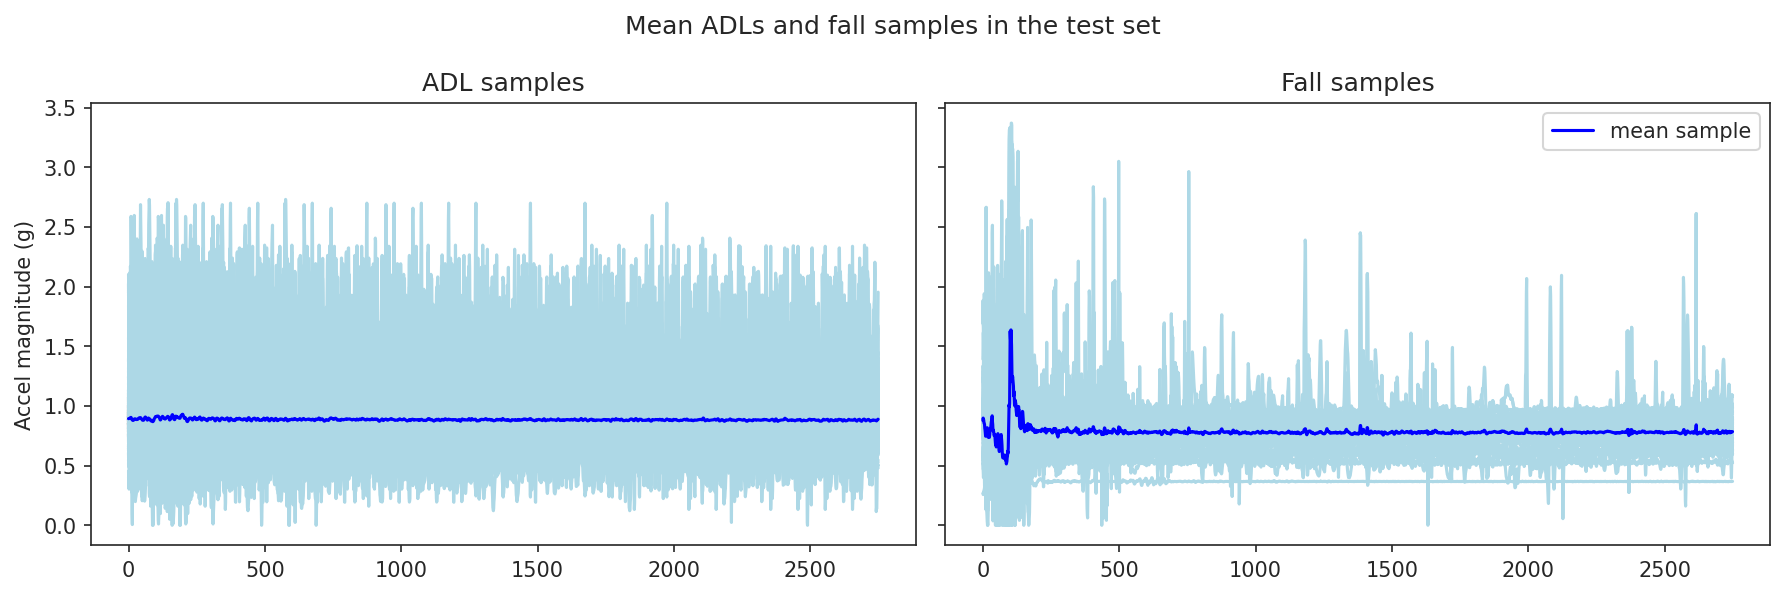

In [4]:
X_train, y_train, X_test, y_test = farseeing.train_test_subjects_split()

## Baselines with Tabular Models

In [82]:
tabular_metrics, models = classifiers.run_tabular_models(
			X_train, y_train, X_test, y_test, freq=100
		)

> LogisticCV        (win_size=2750)	Training/Testing in 156.36 secs.
> RandomForest      (win_size=2750)	Training/Testing in 5.44 secs.
> KNN               (win_size=2750)	Training/Testing in 0.21 secs.
> RidgeCV           (win_size=2750)	Training/Testing in 0.26 secs.
> ExtraTrees        (win_size=2750)	Training/Testing in 0.33 secs.


In [83]:
tabular_metrics

,model,window_size,runtime,precision,recall,f1-score
0,LogisticCV,2750,156.363430,0.896552,0.764706,0.825397
1,RandomForest,2750,5.435552,1.000000,0.852941,0.920635
2,KNN,2750,0.211641,0.785714,0.323529,0.458333
3,RidgeCV,2750,0.263478,0.916667,0.647059,0.758621
4,ExtraTrees,2750,0.326418,0.971429,1.000000,0.985507


In [4]:
tabular_metrics = None
for window_size in [2750, 700, 300]:
	if tabular_metrics is None:
		tabular_metrics = classifiers.run_tabular_models(
			X_train, y_train, X_test, y_test, window_size
		)
	else:
		new_metrics = classifiers.run_tabular_models(
			X_train, y_train, X_test, y_test, window_size
		)
		tabular_metrics = pd.concat([tabular_metrics, new_metrics])

> Logistic          (win_size=2750)	Training/Testing in 7.67 secs.
> RandomForest      (win_size=2750)	Training/Testing in 2.65 secs.
> KNN               (win_size=2750)	Training/Testing in 0.21 secs.
> Ridge             (win_size=2750)	Training/Testing in 0.04 secs.
> ExtraTrees        (win_size=2750)	Training/Testing in 0.25 secs.
> Logistic          (win_size=700)	Training/Testing in 0.5 secs.
> RandomForest      (win_size=700)	Training/Testing in 1.26 secs.
> KNN               (win_size=700)	Training/Testing in 0.08 secs.
> Ridge             (win_size=700)	Training/Testing in 0.02 secs.
> ExtraTrees        (win_size=700)	Training/Testing in 0.24 secs.
> Logistic          (win_size=300)	Training/Testing in 0.53 secs.
> RandomForest      (win_size=300)	Training/Testing in 0.85 secs.
> KNN               (win_size=300)	Training/Testing in 0.06 secs.
> Ridge             (win_size=300)	Training/Testing in 0.01 secs.
> ExtraTrees        (win_size=300)	Training/Testing in 0.26 secs.


In [5]:
tabular_metrics.sort_values(by='model').reset_index().drop(columns=['index'])

,model,window_size,runtime,precision,recall,f1-score
0,ExtraTrees,2750,0.246934,0.933333,0.823529,0.875000
1,ExtraTrees,700,0.243562,0.955556,0.843137,0.895833
2,ExtraTrees,300,0.259331,0.976744,0.823529,0.893617
3,KNN,2750,0.211279,0.774194,0.470588,0.585366
4,KNN,700,0.076052,0.960000,0.470588,0.631579
5,KNN,300,0.057260,0.954545,0.411765,0.575342
6,Logistic,2750,7.666039,0.875000,0.686275,0.769231
7,Logistic,700,0.499531,0.875000,0.686275,0.769231
8,Logistic,300,0.527469,0.875000,0.686275,0.769231
9,RandomForest,2750,2.646030,0.954545,0.823529,0.884211


In [6]:
crosstab = tabular_metrics.pivot_table('f1-score', ['model'], 'window_size')
crosstab

window_size,300,700,2750
model,,,
ExtraTrees,0.893617,0.895833,0.875000
KNN,0.575342,0.631579,0.585366
Logistic,0.769231,0.769231,0.769231
RandomForest,0.884615,0.860000,0.884211
Ridge,0.781609,0.786517,0.639175


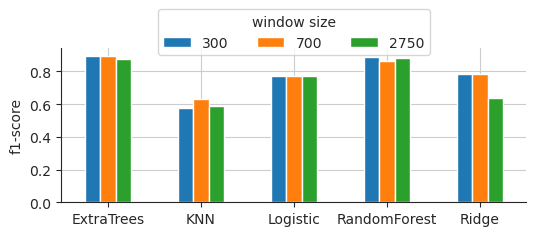

In [7]:
crosstab.plot(kind='bar', rot=0, figsize=(6,2))
plt.grid()
plt.xlabel('')
plt.ylabel('f1-score')
plt.legend(loc=9, ncol=3, bbox_to_anchor=(0.5,1.3), title='window size')
sns.despine()

In [18]:
ts_metrics, ts_models = classifiers.run_ts_models(X_train, y_train, X_test, y_test, freq=100)

> QUANT             (win_size=2750)	Training/Testing in 230.77 secs.


In [5]:
ts_metrics

,model,window_size,runtime,precision,recall,f1-score
0,Hydra,2750,48.658971,0.901961,0.901961,0.901961
1,Rocket,2750,6.650793,0.840000,0.823529,0.831683
2,MultiRocketHydra,2750,52.433394,0.844828,0.960784,0.899083
3,FCN,2750,251.948199,1.000000,0.078431,0.145455
4,Catch22,2750,15.003329,0.676923,0.862745,0.758621
5,QUANT,2750,197.560748,0.903846,0.921569,0.912621
6,DrCIF,2750,20347.538946,0.877551,0.843137,0.860000


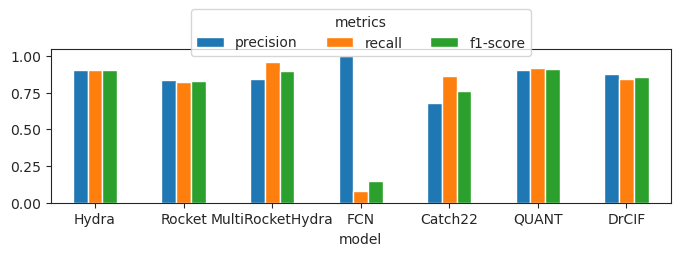

In [19]:
classifiers.plot_metrics(ts_metrics, figsize=(8, 2))

### Explanation

In [19]:
def check_fitted(clf): 
    return hasattr(clf, "classes_")

exp = classifiers.explain_model(ts_models['QUANT'],
                                X_train[:, np.newaxis, :], y_train)

696it [1:47:36,  9.28s/it]                         


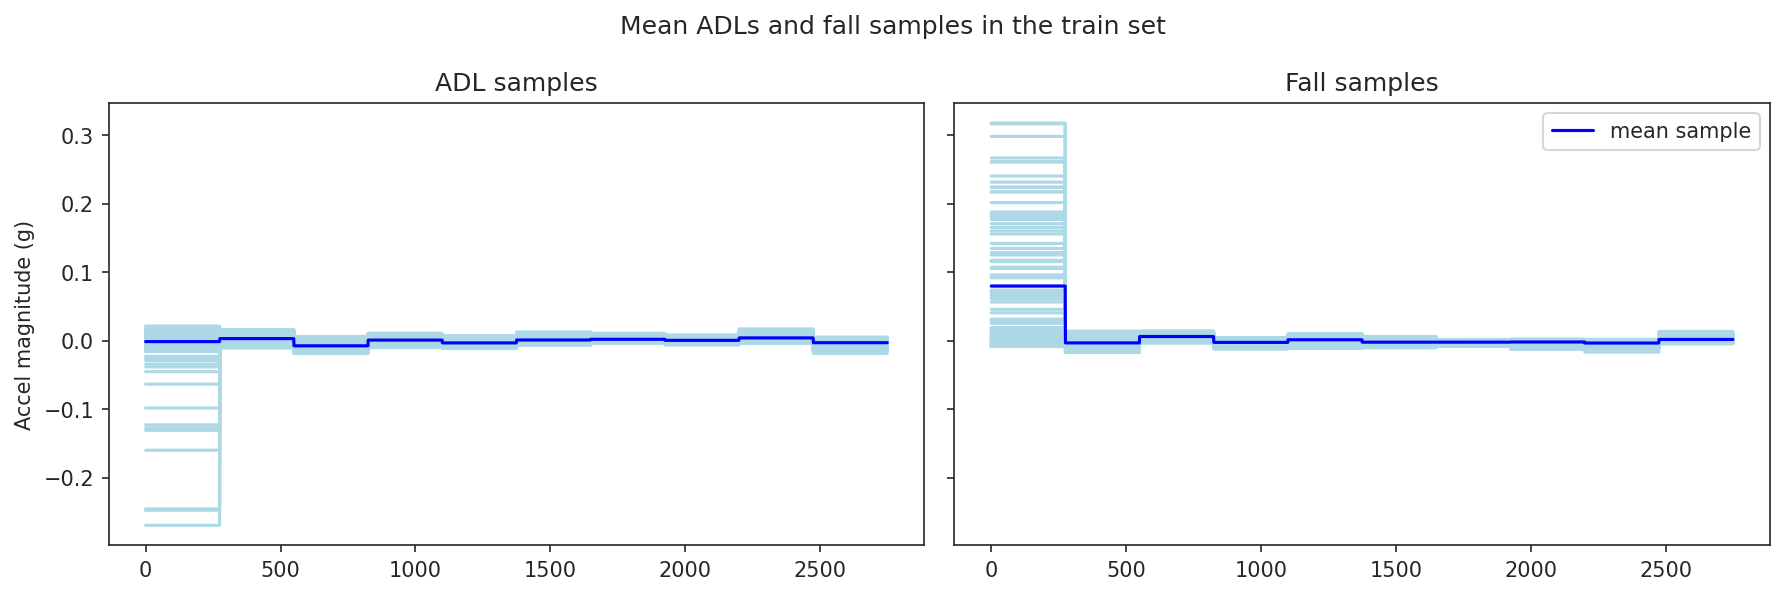

In [22]:
utils.visualize_falls_adls(exp, y_train)

In [26]:
exp_test = classifiers.explain_model(ts_models['QUANT'],
                                X_test[:, np.newaxis, :], y_test,
                                chunks=28)

520it [3:42:44, 25.70s/it]                           


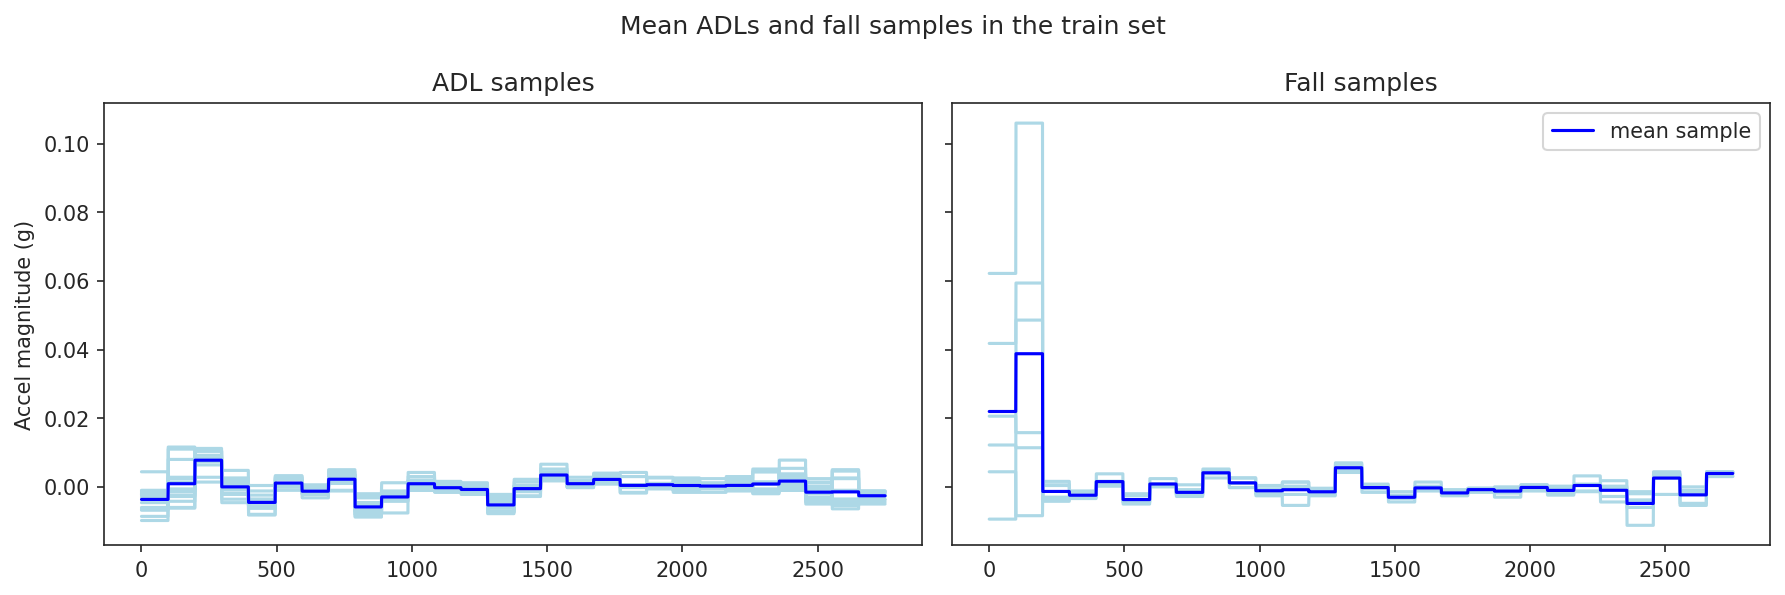

In [25]:
utils.visualize_falls_adls(exp, y_train[:20])

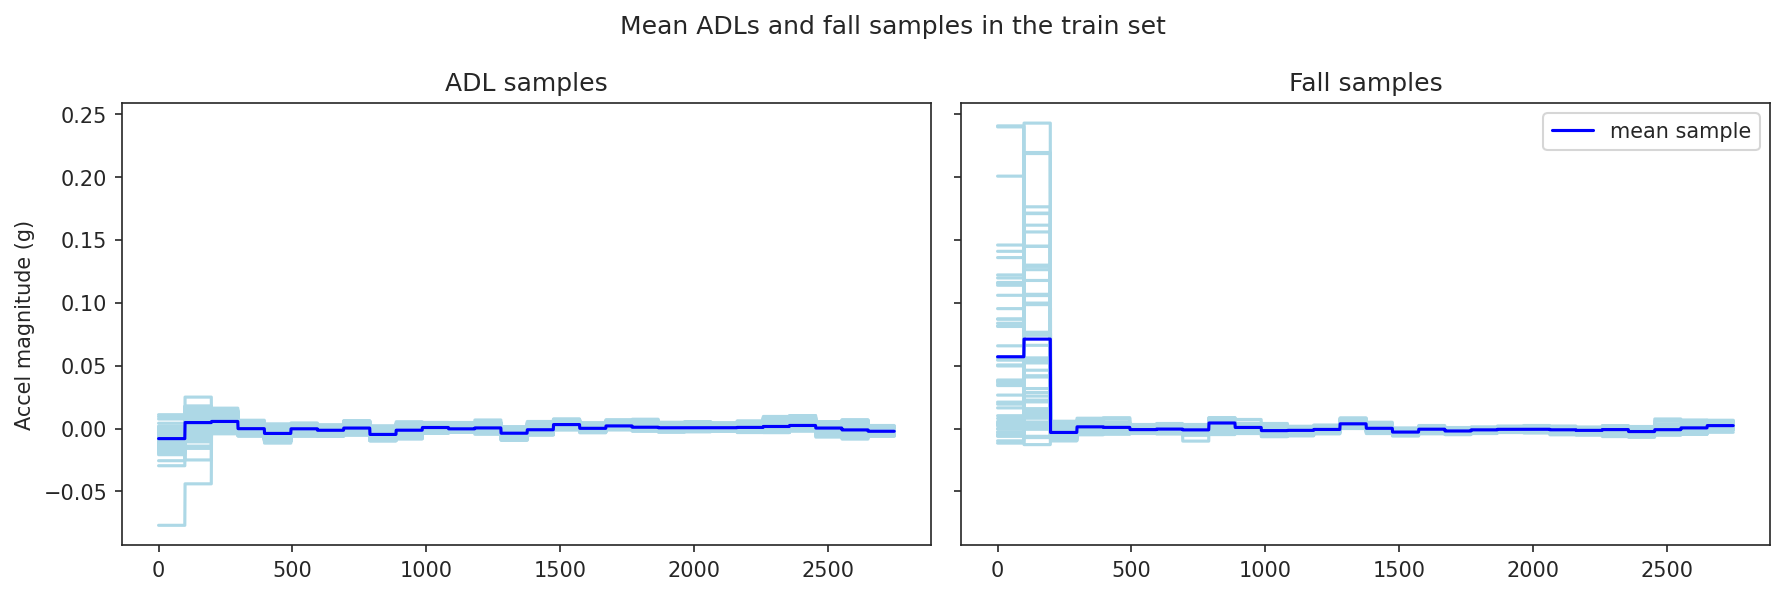

In [27]:
utils.visualize_falls_adls(exp_test, y_test)